In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import configparser
import os

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'
# pytersseract 설치경로 설정해주어야 함

In [ ]:
# # 4버전이랑 3버전이랑 코드가 다름
# OpenCV 4.x
# contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# OpenCV 3.x
# _, contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
# opencv 기본코드들

# 이미지 불러오기 
img_color = cv.imread('test.png')

# 이미지 흑백전환
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# 임계점 설정(threshold)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)

# Contours 추출
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Contours 박스 그리기
for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue


# 이미지 보여주기와 아웃은 같이 써야 jupyter notebook kernel 이 터지지 않음    
# 이미지 보여주기
cv.imshow("result1", img_color)

# 이미지 아웃
cv.waitKey(0)

# 이미지에서 특정 직선 좌표 찾기
cv.HoughLinesP(image, rho, theta, threshod, minLineLength, MaxLineGap)

# 이미지 선분 그리기
# 호프변환에서 얻은 좌표를 다음 line함수에 대입
# start/end point의 좌표는 (x,y)형식 color=BGR(0,0,0)~(255,255,255)
cv.line(img, start_point, end_point, color, thickness)

# # # 이거 뭔지 모르겠다
# for cnt in contours:
#     area = cv.contourArea(cnt)
#     print(area)

In [ ]:
# 연습 - 이미지도 같이 첨부하겠음
img_color = cv.imread('square.png')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

cv.imshow("result", img_color)

cv.waitKey(0)


for cnt in contours:

    epsilon = 0.02 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)
    print( len(approx))

    cv.drawContours(img_color,[approx],0,(0,255,255),5)


cv.imshow("result", img_color)

cv.waitKey(0)

In [60]:
# 다시 정리 시작
# 이미지 전처리 절차
# 이미지 입력 -> RGB-GRAY 변환 -> MorphGradienr(경계 이미지 추출)
# -> Adaptrive Trheshold(잡영제거) -> MoprhClose(작은 구멍을 메우고 경계 강화)
# -> Long Line Remove(글씨 추출에 방해되는 요소 제거) -> Contour추출

In [ ]:
# 절차 변경
# 이미지 입력 -> Long Line Remove -> RGB-Gray변환 -> MorphGradiner
# -> Adaptive Threshold -> MorphClose -> Contour추출(최종 글자 인식 부분)

In [54]:
# 이미지 입력
filename = '(190621).jpg'
image = cv.imread(filename)

In [ ]:
# Long Line Remove(글씨 추출에 방해되는 요소 제거)
# edges = cv.Canny(erosion, 50,150, apertureSize=5)
# dst = image.copy()
# lines = cv.HoughLines(edges, 0.8,np.pi/180,150,srn=100)
# stn=200,min_theta=0,max_theta=np.pi
filename = '(190621).jpg'
image = cv.imread(filename)
# 이미지 새로 불러오지 않으면 계속 덮어서 그림 - 자동함수만들때는 주석처리해줘야함

edges = cv.Canny(image, 50,200,apertureSize=5)
minLineLength = 1000
maxLineGap = 60

# for i in lines:
#     rho, theta = i[0][0], i[0][1]
#     a,b = np.cos(theta), np.sin(theta)
#     x0,y0 = a*rho, b*rho
    
#     scale = image.shape[0] + image.shape[1]
    
#     x1 = int(x0 + scale*-b)
#     y1 = int(y0 + scale*a)
#     x2 = int(x0 + scale*-b)
#     y2 = int(y0 + scale*a)
    
#     cv.line(dst, (x1,y1),(x2,y2),(0,0,255),2)


lines = cv.HoughLinesP(edges,1,np.pi/360,100,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv.line(image,(x1,y1),(x2,y2),(255,255,255),10)

In [ ]:
cv.imwrite('C:\\Labor\\test_line.jpg', image)

In [10]:
cv.imshow('img1',image)
cv.waitKey(0)
cv.destroyAllWindows()
# 선제거는 더 보완이 필요

In [40]:
# RGB - Gray 변환
img2gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(img2gray, 80,255,cv.THRESH_BINARY)
image_final = cv.bitwise_and(img2gray, img2gray, mask=mask)
ret, new_img = cv.threshold(image_final, 80,255,cv.THRESH_BINARY)

In [56]:
# Morph Gradient(경계 이미지 추출)
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(11,11))

dilation = cv.dilate(new_img, kernel, iterations=5)
erosion = cv.erode(new_img,kernel, iterations=6)
result = cv.morphologyEx(image, cv.MORPH_GRADIENT, kernel)

In [ ]:
cv.imshow('result', result)
cv.waitKey()

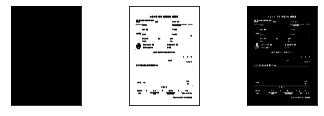

In [42]:
# 이미지 확인 작업
images = [dilation, erosion, result]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
for i in range(3):
    cv.imwrite('C:\\Labor\\test{}.jpg'.format(i), images[i])

In [ ]:
# Adaptrive Trheshold(잡영제거)

In [ ]:
# MoprhClose(작은 구멍을 메우고 경계 강화)

In [57]:
# Contour추출
contours, hierarchy = cv.findContours(erosion, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

In [58]:
# Contour 부분 박스쳐서 이미지 인식 부분 확인하기
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 255), 2)

In [ ]:
cv.imshow('captcha_result', image)
cv.waitKey()

In [59]:
cv.imwrite('C:\\Labor\\test.jpg', image)

True